In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:

''' #############################
  #   import all our libraries   #
    ############################# '''
    
# markdown libraries
from IPython.display import HTML

# data wrangling libraries
import pandas as pd
import json

# useful data structures for analysis
from collections import defaultdict, Counter
import heapq

# visualization library
import matplotlib.pyplot as plt

<h1>Exploratory Data Analysis (EDA)</h1>
<hr>

EDA stands for exploratory data analysis. For any data science related type of project, this is almost always the first step once you have the data. It is a bit of a loose term that basically encompasses a wide variety of tasks of types of analysis we might do with data. It will vary greatly your project and what kind of data you have.

Here are some notes on how to approach EDA from different sources. What kinds of questions to ask? What techniques to use?

<hr>

<li><b>https://www.geeksforgeeks.org/data-analysis/what-is-exploratory-data-analysis/</b></li>

<p>EDA "Helps to understand the dataset by showing how many features it has, what type of data each feature contains and how the data is distributed... Helps to identify hidden patterns and relationships between different data points which help us in and model building... Allows to identify errors or unusual data points (outliers) that could affect our results... The insights gained from EDA help us to identify most important features for building models and guide us on how to prepare them for better performance... By understanding the data it helps us in choosing best modeling techniques and adjusting them for better results."

Here are some major goals and a common way to break up the tasks involved. 

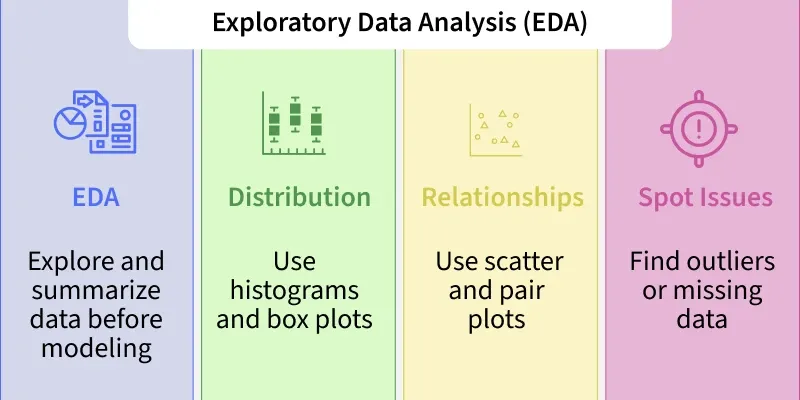

Where does EDA fit in with data collection and presentation of our findings? 

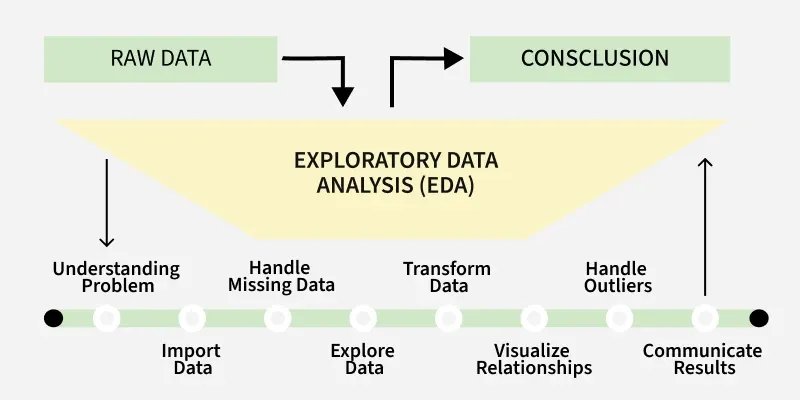

By exploring data, a major part of that means understanding the different variables in the data. We can break this analysis down into several categories. 

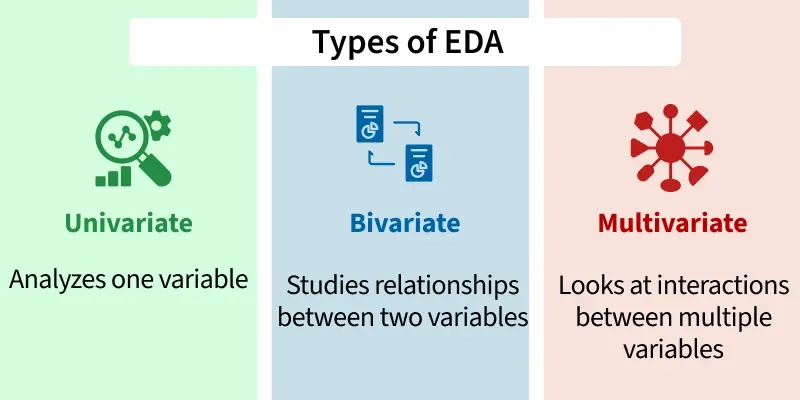

1. <b>Univariate</b> analysis focuses on studying one variable to understand its characteristics. It helps to describe data and find patterns within a single feature. Various common methods like histograms are used to show data distribution, box plots to detect outliers and understand data spread and bar charts for categorical data. Summary statistics like mean, median, mode, variance and standard deviation helps in describing the central tendency and spread of the data

2. <b>Bivariate</b> Analysis focuses on identifying relationship between two variables to find connections, correlations and dependencies. It helps to understand how two variables interact with each other. Some key techniques include:

Scatter plots which visualize the relationship between two continuous variables.
Correlation coefficient measures how strongly two variables are related which commonly use Pearson's correlation for linear relationships.
Cross-tabulation or contingency tables shows the frequency distribution of two categorical variables and help to understand their relationship.
Line graphs are useful for comparing two variables over time in time series data to identify trends or patterns. Covariance measures how two variables change together but it is paired with the correlation coefficient for a clearer and more standardized understanding of the relationship.

3. <b>Multivariate</b> Analysis identify relationships between two or more variables in the dataset and aims to understand how variables interact with one another which is important for statistical modeling techniques. It include techniques like:

Pair plots which shows the relationships between multiple variables at once and helps in understanding how they interact. Another technique is Principal Component Analysis (PCA) which reduces the complexity of large datasets by simplifying them while keeping the most important information. Spatial Analysis is used for geographical data by using maps and spatial plotting to understand the geographical distribution of variables.

Time Series Analysis is used for datasets that involve time-based data and it involves understanding and modeling patterns and trends over time. Common techniques include line plots, autocorrelation analysis, moving averages and ARIMA models.

Besides this structure of EDA and these techniques of variable analysis, we can also ask these types of big picture questions. These are qualitative questions that can be even more important to our presentation than quantitative. These are questions that we should consider, some more big picture and some more technical. 

1. What is the business goal or research question?
2. What are the variables in the data and what do they represent?
3. What types of data (numerical, categorical, text, etc.) do you have?
4. Are there any known data quality issues or limitations?
5. Are there any domain-specific concerns or restrictions?

<hr>

<li><b>https://www.ibm.com/think/topics/exploratory-data-analysis</b></li>

<p>"The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about standard deviations, categorical variables, and confidence intervals. Once EDA is complete and insights are drawn, its features can then be used for more sophisticated data analysis or modeling, including machine learning."

1. Specific statistical functions and techniques you can perform with EDA tools include:

2. Clustering and dimension reduction techniques, which help create graphical displays of high-dimensional data containing many variables.

3. Univariate visualization of each field in the raw dataset, with summary statistics.

4. Bivariate visualizations and summary statistics that allow you to assess the relationship between each variable in the dataset and the target variable you’re looking at.

5. Multivariate visualizations, for mapping and understanding interactions between different fields in the data.

6. K-means clustering, which is a clustering method in unsupervised learning where data points are assigned into K groups, i.e. the number of clusters, based on the distance from each group’s centroid. The data points closest to a particular centroid will be clustered under the same category. K-means clustering is commonly used in market segmentation, pattern recognition, and image compression.

7. Predictive models, such as linear regression, use statistics and data to predict outcomes.
</p>

More readings if interested.

<li><b>https://medium.com/data-science/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184</b></li>

<li><b>https://www.epa.gov/caddis/exploratory-data-analysis</b></li>

<h3>Hopefully this gives some context around what we should be aiming to do!</h3>

<h3>Quick reminder of JSON formatted data</h3>
JSON stands for JavaScript Object Notation. It is the practice of storing data in key value pairs, like a dictionary in Python. This would be pretty simple, except that the values can be dictionaries of key value pairs themselves. Thus, JSON data is often nested dictionaries, which can be messy. So we can look inside, print the dictionaries, and see how the nested dictionaries are structured.

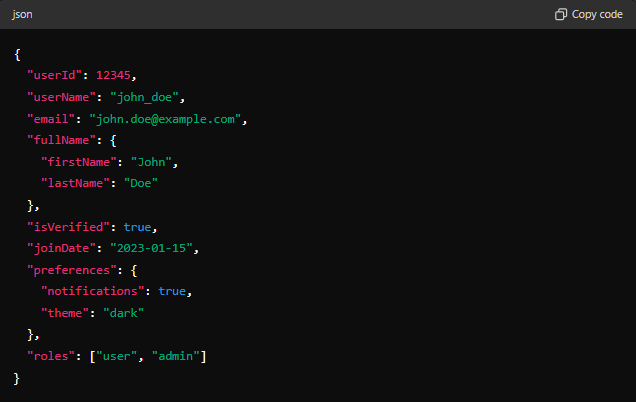

This is how datamatch's data is formatted.

In [3]:

# load the data, using the json library. 
with open('datamatch2025_database.json', 'r') as data_json_file:
    data = json.load(data_json_file)
    
print(f"This is the data type of our data: {type(data)}. Interesting!")
    
# Let's take a look at the different sections of the data.
print("\nLet's take a look at the different sections of the data.")
for k, _ in data.items():
    print(k)

This is the data type of our data: <class 'dict'>. Interesting!

Let's take a look at the different sections of the data.
codes
crushes
dateOptions
emailToName
feedback
landing
matchCatalog
matches
messages
notifs
privateProfile
publicProfile
reportList
responses
searchIndex
smallProfile
sponsors
stats
status
unix


Let's first dive into the profile data of all Datamatch users. 

<h1>Let's get started: Private Profile Data</h1>

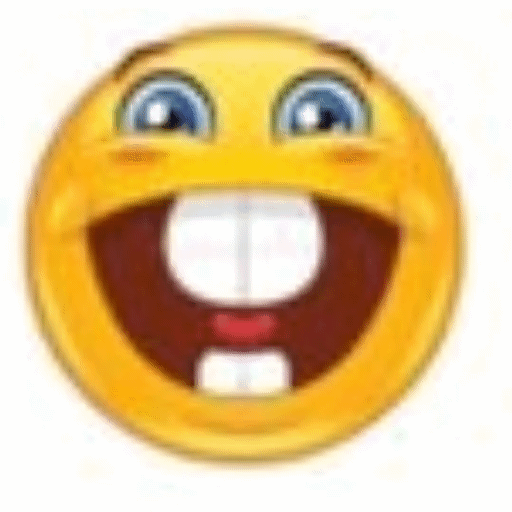

Let's first look at different types private profile data. To make our life easier, let's convert this json data to tabular data, i.e. a pandas dataframe.

<h3>Note from Josh</h3>

This is how Datamatch stores its users. They are one section of this giant
JSON object: the "matches" section, in the form of a JSON object or dictionary. The key of 
each key-value pair is their ID, which is a bunch of random characters which uniquely
identfy each user. 

The actual meat and potatoes of the user data is stored in the value of the key-value pairs.
It comes in the form of another dictionary of key value pairs! From there, we see data about
what type of relationship they are looking for. Their rating, gender, etc. 

In [4]:
# Take the matches section of the data, i.e. the key corresponding to "matches". 
private_profile_data = data["privateProfile"]
print(f"There are {len(private_profile_data)} users. Wow, that's so awesome. Datamatch is so awesome.")

There are 14938 users. Wow, that's so awesome. Datamatch is so awesome.


In [5]:
# Let's take a peak at this data.
print("Let's take a peak at this data! What does each user look like.")
for k, v in private_profile_data.items():
    print(k, v)

Let's take a peak at this data! What does each user look like.
001QfD4A4ATDX9Rckgds8cHWJAY2 {'age': 20, 'alreadyVisited': True, 'dealbreakers': {'ageRange': 3, 'dorms': ['GS'], 'restrictAge': True}, 'email': 'ss6679@columbia.edu', 'gender': {'genderValue': 'woman'}, 'lookingFor': 'love and friendship', 'lookingForGender': {'friendship': 'men & women', 'love': 'men'}, 'loveLanguage': {'lovelang': 'Acts of Service'}, 'matchCategory': 3, 'matchRevealed': True, 'pronouns': ['she/her'], 'redFlags': [8, 67, 74], 'show': True, 'signupNum': 4793, 'similar': True, 'zodiac': {'sign': 'Gemini'}}
00ImeBetMvRXzDas7NOazGRgafq2 {'age': 22, 'email': 'bdstarr@uchicago.edu', 'gender': {'genderValue': 'man', 'optional': 'Male'}, 'lookingFor': 'love', 'lookingForGender': {'friendship': 'women', 'love': 'women'}, 'matchRevealed': True, 'redFlags': [133, 157, 61], 'show': True, 'signupNum': 1739}
00tLyXpalnMK35zpp3X0teVoDUl2 {'age': 20, 'alreadyVisited': True, 'dealbreakers': {'ageRange': 2, 'restrictAge': 

In [6]:
# start off with an empty dataframe.
private_profile_df = pd.DataFrame()
for k, v in private_profile_data.items():
    new_row = {
        "id": k,
        "age": None if "age" not in v else v["age"],
        "already_visited": None if "alreadyVisited" not in v else v["alreadyVisited"],
        "dealbreakers": None if "dealbreakers" not in v else v["dealbreakers"],
        "email": None if "email" not in v else v["email"],
        "gender": None if "gender" not in v else v["gender"],        
        "looking_for": None if "lookingFor" not in v else v["lookingFor"],
        "looking_for_gender": None if "lookingForGender" not in v else v["lookingForGender"],
        "love_language": None if "loveLanguage" not in v else v["loveLanguage"],
        "match_category": None if "matchCategory" not in v else v["matchCategory"],
        "match_revealed": None if "matchRevealed" not in v else v["matchRevealed"],
        "pronouns": None if "pronouns" not in v else v["pronouns"], 
        "red_flags": None if "redFlags" not in v else v["redFlags"],
        "show": None if "show" not in v else v["show"],
        "signup_num": None if "signupNum" not in v else v["signupNum"],
        "zodiac": None if "zodiac" not in v else v["zodiac"],
        "favorites":  None if "favorites" not in v else v["favorites"],
        "favorites_entry": None if "favoritesEntry" not in v else v["favoritesEntry"],
        "mbti": None if "mbti" not in v else v["mbti"],
    }
    
    # and we slowly append to the end of the dataframe to get all our data into the table!
    private_profile_df = pd.concat([private_profile_df, pd.DataFrame([new_row])], ignore_index=True)
print(f"How many private profiles are there: {len(private_profile_df)}.")

# what about harvard specific profiles? 
harvard_private_profile_df = private_profile_df[
    private_profile_df["email"].notna() & private_profile_df["email"].str.endswith("college.harvard.edu")
]

print(f"How many harvard private profiles are there: {len(harvard_private_profile_df)}.")

How many private profiles are there: 14938.
How many harvard private profiles are there: 3135.


In [7]:
# Get rid of emails for privacy purposes.
harvard_private_profile_df.drop(["email"], axis=1)

# This "head" method gives us a look at the first 5 data points. 
harvard_private_profile_df.head()


id age already_visited  \
2   00tLyXpalnMK35zpp3X0teVoDUl2  20            True   
4   02AkLousUAWqzvirdYnpfA0bjds2  18            True   
17  05esDoqTIYdZSYzHEgHIbtuXRWj2  18            True   
18  05fW9zYtcAME1CaPNzsUgG13T9o1  21            True   
19  05hk4ZByvCaDQJM803oO99izQL33  21            None   

                            dealbreakers  \
2   {'ageRange': 2, 'restrictAge': True}   
4                 {'restrictAge': False}   
17                {'restrictAge': False}   
18                {'restrictAge': False}   
19                {'restrictAge': False}   

                                        email                    gender  \
2                    rzhu@college.harvard.edu    {'genderValue': 'man'}   
4          brandonmendoza@college.harvard.edu    {'genderValue': 'man'}   
17  alanafuenteslartigaut@college.harvard.edu  {'genderValue': 'woman'}   
18                  nking@college.harvard.edu  {'genderValue': 'woman'}   
19              nia_weeks@college.harvard.edu  {'genderValue': 'woman'}   

            looking_for                            looking_for_gender  \
2            friendship                         {'friendship': 'men'}   
4   love and friendship      {'friendship': 'women', 'love': 'women'}   
17  love and friendship  {'friendship': 'men & women', 'love': 'men'}   
18                 love                               {'love': 'men'}   
19                 love                               {'love': 'men'}   

                           love_language match_category match_revealed  \
2                                   None           None           True   
4                                   None           None           True   
17  {'lovelang': 'Words of Affirmation'}              1           True   
18        {'lovelang': 'Physical Touch'}              2           True   
19                                  None           None           True   

    pronouns        red_flags  show signup_num              zodiac  \
2   [he/him]  [104, 146, 172]  True       3088                None   
4       None    [27, 93, 109]  True       8947                None   
17      None   [35, 148, 161]  True       2958                None   
18      None    [19, 43, 153]  True       3624  {'sign': 'Gemini'}   
19      None   [52, 161, 162]  True       9582                None   

       favorites favorites_entry  mbti  
2           None            None  None  
4           None            None  None  
17          None            None  ENTJ  
18  Music Artist   billie eilish  None  
19          None            None  None

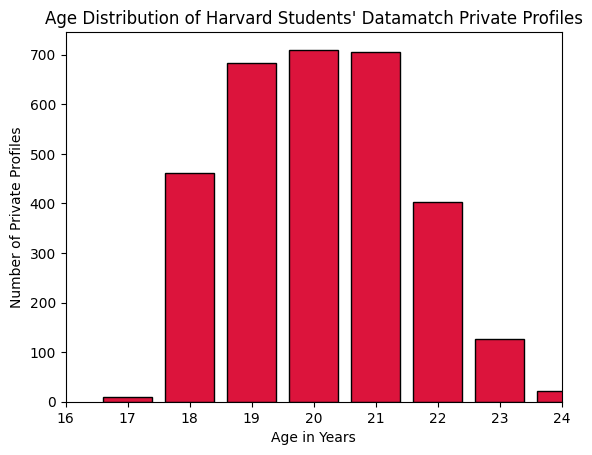

In [8]:
# Let's look into the age distribution 
age_freq_mp = defaultdict(int)
for age in harvard_private_profile_df["age"]:
    if age is not None:
        age_freq_mp[age] += 1

# Sort by age for nicer display
ages = sorted(age_freq_mp.keys())
counts = [age_freq_mp[a] for a in ages]

plt.bar(ages, counts, color='crimson', edgecolor='black')
plt.xlim(16, 24)
plt.xlabel("Age in Years")
plt.ylabel("Number of Private Profiles")
plt.title("Age Distribution of Harvard Students' Datamatch Private Profiles")
plt.show()

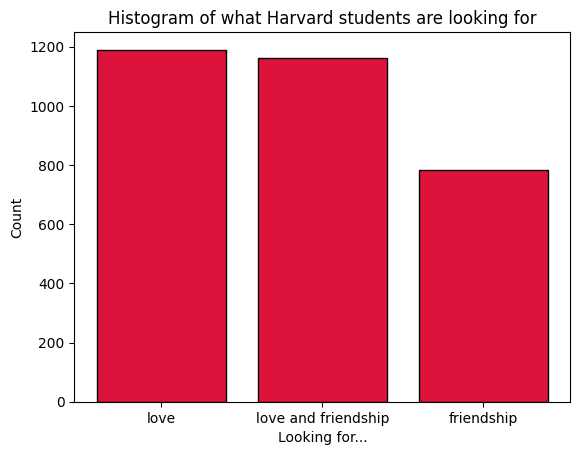

In [9]:
looking_for_freq_mp = Counter(harvard_private_profile_df["looking_for"])
items, counts = zip(*sorted(looking_for_freq_mp.items(), key=lambda x: x[1], reverse=True))

plt.bar(items, counts, color='crimson', edgecolor='black')
plt.xlabel("Looking for...")
plt.ylabel("Count")
plt.title("Histogram of what Harvard students are looking for")
plt.show()

1913 many users did not report an MBTI type.


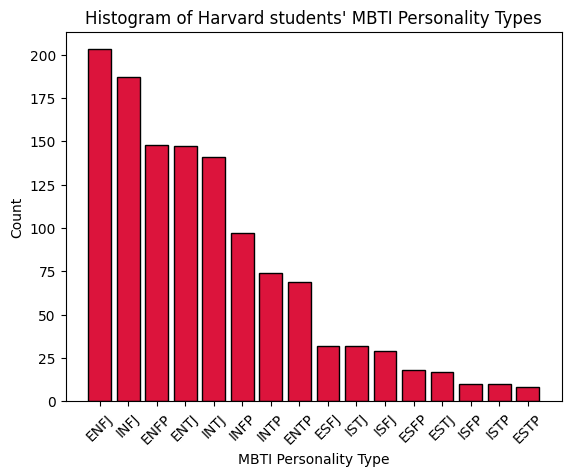

In [10]:
mbti_freq_mp = Counter(harvard_private_profile_df["mbti"])
num_not_reported = mbti_freq_mp[None]
del mbti_freq_mp[None]

items, counts = zip(*sorted(mbti_freq_mp.items(), key=lambda x: x[1], reverse=True))

plt.bar(items, counts, color='crimson', edgecolor='black')
plt.xlabel("MBTI Personality Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Histogram of Harvard students' MBTI Personality Types")

print(f"{num_not_reported} many users did not report an MBTI type.")
plt.show()



0 many users did not report an love language.


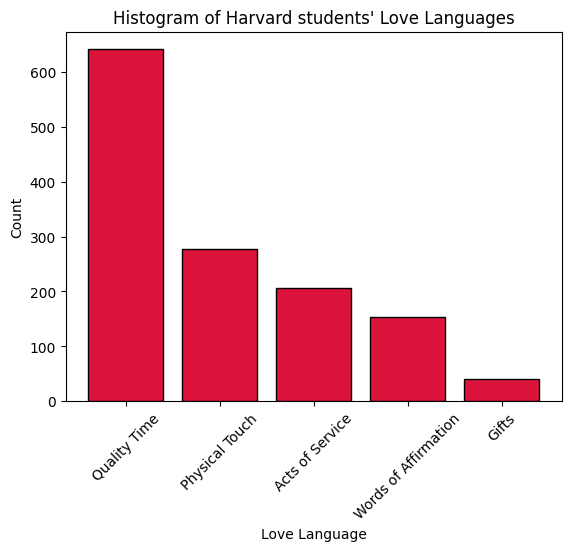

In [11]:
love_lang_freq_mp = defaultdict(int)
for obj in harvard_private_profile_df["love_language"]:
    if obj is None:
        love_lang_freq_mp[obj] += 1
    else:
        (_, love_lang), =  obj.items()
        love_lang_freq_mp[love_lang] += 1
        
num_not_reported = love_lang_freq_mp[None]
del love_lang_freq_mp[None]  

num_not_reported = love_lang_freq_mp[None]
del love_lang_freq_mp[None]      

# Sort by age for nicer display
ages = sorted(love_lang_freq_mp.keys())
counts = [love_lang_freq_mp[a] for a in ages]

items, counts = zip(*sorted(love_lang_freq_mp.items(), key=lambda x: x[1], reverse=True))

plt.bar(items, counts, color='crimson', edgecolor='black')
plt.xlabel("Love Language")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Histogram of Harvard students' Love Languages")

print(f"{num_not_reported} many users did not report an love language.")
plt.show()

A few questions I thought of:

Try and find how Harvard's MBTI types different from other schools?
Try and find how Harvard's love languages differ from other schools?
Is there a correlation between MBTI and love language?
Which course has the most red flags?

In [12]:
red_flags = [
  'Uses the Datamatch website on their phone',
  'Claims to be “brutally honest” but is actually just brutal',
  'Compulsively makes peace signs with hands in photos',
  'Drinks 187823 cups of coffee a day and still falls asleep in class',
  'Screen time is 13 hours a day',
  'Hasn’t done laundry in four weeks',
  '“I love traveling and going on adventures”',
  'Instagram bio reaches the character limit',
  'Wakes up after sunset',
  'Responds to texts after 3 business days',
  'Enjoys steak “well done”',
  'Only responds to Snapchat',
  'Uses 😂 rather than 💀',
  'You think the Aphrodite (/Marriage Pact) questions are good',
  'Denies having red flags',
  'Is banned from Twitter',
  'Seems like a round-earther',
  '“god you have so many red flags you’re such a shit person”',
  'Holds scissors with the blades facing up',
  'Doesn’t like dark chocolate',
  'Doesn’t eat pizza crust',
  'Doesn’t know how to calculate tip without a calculator',
  'Doesn’t wear enough sunscreen',
  'Cannot parallel park',
  'Takes the first item off the shelf when shopping rather than looking for the best one',
  'Doesn’t check expiration dates when shopping for food',
  'Doesn’t know their HUID number',
  'Doesn’t drink enough water',
  'Hates cilantro',
  'Has a cracked phone screen',
  'Enjoys cold showers',
  'Never takes out the trash',
  'Shuffles playlists and skips to the song they want to listen to rather than just clicking on the song',
  'Thinks sunglasses actually make them look cool ',
  'Wears sweatpants too often',
  'Never learned how to swim',
  'Probably can’t swim',
  'Cannot cut paper in a straight line',
  'Sniffed glue as a child',
  'Sniffed sharpies as a child',
  'Sniffed white out as a child',
  'Enjoys the smell of gasoline',
  'Tells friends when they’re sent memes that they’ve seen before',
  'Probably snorted smarties at least once in their life',
  'Secretly thinks they’re good at dancing when they aren’t',
  'Secretly thinks they’re better at singing than they actually are',
  'Has allergies',
  'Doesn’t moisturize their hands enough',
  'Gives up on hobbies way too easily',
  'Doesn’t pursue anything they’re not immediately good at',
  'Hasn’t read an actual book in months',
  'Eats food past their expiration date',
  'Spends too much money',
  'Checks themselves out in every window they pass by while walking',
  'Thinks they are the main character ',
  'Uses too many paper towels',
  'Doesn’t fold toilet paper properly',
  'Has stomach problems',
  'Needs to work on their flexibility',
  'Hips already hurt',
  'Asks questions on Youtube they could easily just Google',
  'Binges every show they like all in one day',
  'Likes air conditioning a little too much',
  'Has bad posture',
  'Slouches too much',
  'Backpack straps are not at the right length',
  'Doesn’t tie their shoes properly',
  'Still sings the ABCs when figuring out alphabetical order',
  'Lowkey enjoys getting sung “Happy Birthday” to in public',
  'Rates themselves too highly on a scale from 1 to 10',
  'Takes the phrase “treat others the way you want to be treated” a little too literally',
  'Is too much of a people pleaser',
  'Would rather be right than preserve a friendship',
  'Speaks too loudly on public transportation',
  'Laughs too loudly in public',
  'Cannot balance on one foot',
  'Doesn’t eat enough vegetables',
  'Has dropped food on the ground and still eaten it',
  'Needs to call their loved ones more often',
  'Has too many unread emails in their inbox',
  'Doesn’t own a lint roller',
  'Has too many pairs of shoes',
  'Sneezes into their hands ',
  'Apologizes to inanimate objects that they crash into',
  'Says “sorry” too much',
  'Doesn’t separate recycling and trash',
  'Was chosen last in P.E. as a child',
  'Peeled the wrappers off of crayons as a child',
  'Cannot squash insects on their own',
  'Still scared of spiders',
  'Gives the other person the “smaller” half when asked to share',
  'Hasn’t washed their bedsheets in weeks',
  'Consistently sleeps through their alarms',
  'Secretly actually enjoys “Baby” by Justin Bieber',
  'Constantly reminisces about how amazing 2016 summer was',
  'Enjoys playing devil’s advocate',
  'Doesn’t use their own Netflix subscription',
  'Still uses their ex’s Netflix account',
  'Still has an imaginary friend',
  'Has used the same password for everything since they were 12',
  'Doesn’t like broccoli',
  'Orders the same thing every time at a restaurant',
  'Cannot navigate with a regular map',
  'Constantly loses track of everything',
  'Cannot handle spice',
  'Compulsively writes "lol" after every text no matter the content',
  'Compulsively writes "haha" after every text no matter the content',
  'Texts with perfect capitalization and punctuation',
  'Owns LED lights in their room',
  'Investing in Robinhood',
  'Wear their mask under their nose',
  'Constantly pulling all nighters for classes',
  'Does not wear pants during zoom calls',
  'Says “Ethereum” or “Bitcoin” several times a day',
  'Reshares every birthday shout out they get on Instagram',
  'Joins clubs just for the Patagonias',
  'Says “if they wanted to they would,” but actually wants to, and yet doesn’t',
  'Wears Anti Social Social Club, Supreme, or Thrasher',
  'Carries a skateboard around campus for the aesthetic but can’t skate ',
  '“[insert name] would like to connect with you on Linkedin”',
  'Is a premed student because they “want to help people”',
  '“Can cook” but only knows how to make eggs',
  'Wears shoes on their bed',
  'Does not peel bananas correctly',
  'Has not called their parent(s) recently',
  'A little too fond of playing devil’s advocate',
  'Has stolen utensils from the dining hall (please put them back)',
  'Leaves water on the floor after they shower',
  'Does not separate their whites and colors for laundry',
  'Does not know how to scoop soup with a soup ladle while spilling a little soup in the process',
  'Probably holding a fish in dating profile.',
  'Blasts SOUR after frat parties to express true emotions',
  'Blasts Marvin’s Room after frat parties to express true emotions',
  'Blasts Lucid Dreams after frat parties to express true emotions',
  'Plays devil’s advocate with a little too much vigor',
  'Doesn’t own a bedframe',
  'Name starts with J',
  'Protein shaker bottle doubles as a regular water bottle',
  'Reddit is default form of entertainment',
  'Wakes up every morning thinking “last night was a movie”',
  'Navy blue sheets',
  'Wants to switch lives with Pete Davidson',
  'Puts a Supreme sticker over laptop logo',
  'Listens to Call Her Daddy for sex advice',
  'Puts tie on your head when drunk and thinks it’s funny',
  'No trash can in the bathroom',
  'Takes blurry selfies where only hair is visible',
  'Wears shorts in 20 degrees because “it’s not cold outside”',
  'Drinks only protein shakes',
  'Relates to Drake',
  'Relates to Pete Davidson (in their dreams)',
  'Relates to Mitch McConnell',
  'Wears Vineyard Vines',
  'Salmon shorts',
  'Patagonia',
  'Would rather die than become a vegetarian',
  '“I know a spot”',
  "Doesn't drink water or eat vegetables ",
  'Toxic in COD lobby',
  'Bought an NFT and actually thinks it’s worth something',
  'Worships Elon Musk',
  'Tells everyone that hey’re making the next Facebook',
  'Religiously drinks 3 glasses of milk every day',
  'Says “sheeeeeeesh” when at a loss for words',
  'Thinks their terrible British accent is hilarious and brilliant',
  'Believes that women don’t fart',
  'Only wears muscle tanks',
  'Genuinely enjoyed Wolf of Wall Street',
  'Deez nuts jokes',
  'Seriously contemplated filming a “day in the life”',
  '“Builder, Innovator, Entrepreneur | Forbes 30 Under 30”',
  'Pulls 🅿️',
  'Thinks they could pull off long hair',
  'Owns a rainbow keyboard',
  'Has protein powder, pre-workout, and creatine on hand',
  'Listens to Weezer',
  'Uses 3-in-1 body wash-conditioner-shampoo',
  'Socks and sandals, need I say more?',
  'Plays League of Legends',
  'Listens to Machine Gun Kelly',
  'Listens to Eminem ',
  'Talks about post nut clarity',
  'Hasn’t cried in a few years',
  'Says the words “no nut november” ',
  '“Look how it just beads off”',
  'Always shirtless at home',
  'No skincare routine',
  'Powerlifts',
  'Listens to true crime podcasts to fall asleep',
  'Owns 9 canvas tote bags that would need to be used 100 times each to offset their environmental impact relative to paper bags',
  'Claims to be completely self-actualized after going to therapy once',
  'Rejects potential dates based on their sign',
  'Gets icked by life',
  'Posts that one beach picture where they’re in a bikini kneeling with their hands in their hair',
  'Wears scarves as shirts',
  'Secretly wouldn’t mind if Timothee Chalamet gave them chlamydia',
  'Thinks liking dogs is a personality trait',
  'No sense of direction, both GPA and GPS',
  'Says their kink is “liberal men who look like Republicans”',
  'Justifies every decision with “the girls who get it, get it”',
  'Claps back at haters with “the girls who don’t, don’t”',
  'Ends texts with “uwu” or “owo.” uwu',
  'Is not like other girls',
  '“$10 off an $89 skirt at Aritzia? What a steal”',
  'Records TikTok dances in their dorm room',
  'Owns 12 succulents that are all dead',
  'Enjoys “propagating plants”',
  'Navy blue Longchamp tote',
  'Brags about thrifting',
  '“Dress is from Sheeeeein”',
  'Wants you to give them flowers but doesn’t want to have to ask you to give them flowers because it would ruin the integrity of the gesture',
  'Seriously contemplated becoming a YouTuber',
  'Comments “So gorg ily 😍” on posts from people they actually hate',
  'Has already planned out their wedding aesthetic',
  'Has too many bruises all the time',
  'Overpacks for every trip',
  'Takes a picture of every sunset they see',
  'Overshares on their Instagram/Snapchat story',
  'Starts any conversation with “so anyways”',
  'Has a polaroid wall',
  'Has a Glossier sticker on their Hydroflask',
  'Euphoria-obsessed',
  'Has enough pillows to cover their entire bed',
  'Uses the 🥺emoji',
  'Wear glasses with no prescription lenses',
  'Wear blue light glasses',
  'Makes Trader Joe’s their personality ',
  'Goes to SoulCycle',
  'Carries around the Lululemon bag every day as a normal bag',
  'Walking Lululemon ambassador',
  'Calls going to Target an adventure',
]

num_to_red_flags = {i: red_flags[i] for i in range(len(red_flags))}

0 many users did not report an MBTI type.


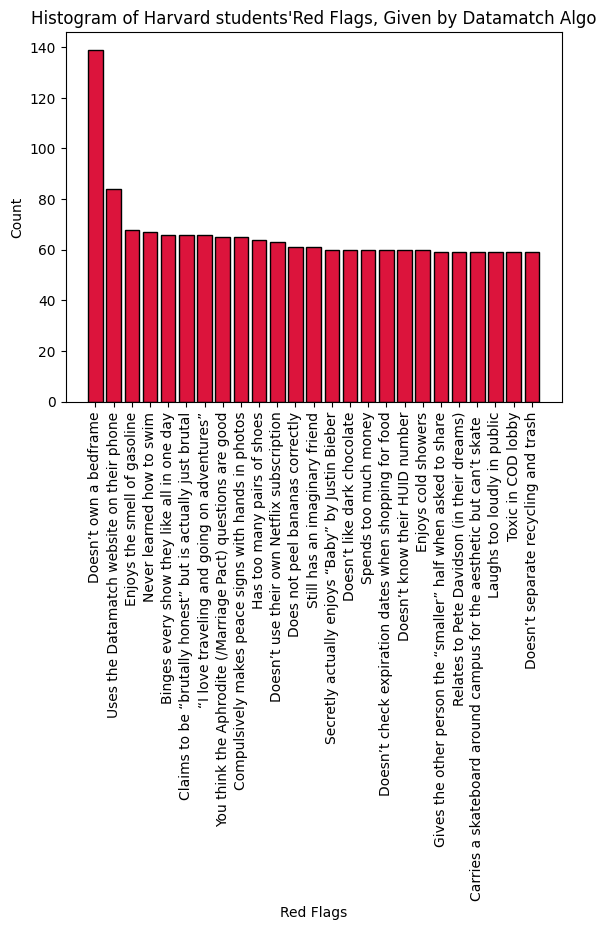

In [13]:
k = 25

harvard_red_flags = defaultdict(int)
for obj in harvard_private_profile_df["red_flags"]:
    if obj is None: continue
    for red_flag_num in obj:
        red_flag = num_to_red_flags[red_flag_num]
        harvard_red_flags[red_flag] += 1
topk_red_flags_lst = sorted(harvard_red_flags.items(), key=lambda item: item[1], reverse=True)[:k]

topk_red_flags = defaultdict(int)
for red_flag, freq in topk_red_flags_lst:
    topk_red_flags[red_flag] = freq
    
    
items, counts = zip(*sorted(topk_red_flags.items(), key=lambda x: x[1], reverse=True))

plt.bar(items, counts, color='crimson', edgecolor='black')
plt.xlabel("Red Flags")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Histogram of Harvard students'Red Flags, Given by Datamatch Algo")

print(f"{num_not_reported} many users did not report an MBTI type.")
plt.show()

In [14]:
harvard_private_profile_df.head()

id age already_visited  \
2   00tLyXpalnMK35zpp3X0teVoDUl2  20            True   
4   02AkLousUAWqzvirdYnpfA0bjds2  18            True   
17  05esDoqTIYdZSYzHEgHIbtuXRWj2  18            True   
18  05fW9zYtcAME1CaPNzsUgG13T9o1  21            True   
19  05hk4ZByvCaDQJM803oO99izQL33  21            None   

                            dealbreakers  \
2   {'ageRange': 2, 'restrictAge': True}   
4                 {'restrictAge': False}   
17                {'restrictAge': False}   
18                {'restrictAge': False}   
19                {'restrictAge': False}   

                                        email                    gender  \
2                    rzhu@college.harvard.edu    {'genderValue': 'man'}   
4          brandonmendoza@college.harvard.edu    {'genderValue': 'man'}   
17  alanafuenteslartigaut@college.harvard.edu  {'genderValue': 'woman'}   
18                  nking@college.harvard.edu  {'genderValue': 'woman'}   
19              nia_weeks@college.harvard.edu  {'genderValue': 'woman'}   

            looking_for                            looking_for_gender  \
2            friendship                         {'friendship': 'men'}   
4   love and friendship      {'friendship': 'women', 'love': 'women'}   
17  love and friendship  {'friendship': 'men & women', 'love': 'men'}   
18                 love                               {'love': 'men'}   
19                 love                               {'love': 'men'}   

                           love_language match_category match_revealed  \
2                                   None           None           True   
4                                   None           None           True   
17  {'lovelang': 'Words of Affirmation'}              1           True   
18        {'lovelang': 'Physical Touch'}              2           True   
19                                  None           None           True   

    pronouns        red_flags  show signup_num              zodiac  \
2   [he/him]  [104, 146, 172]  True       3088                None   
4       None    [27, 93, 109]  True       8947                None   
17      None   [35, 148, 161]  True       2958                None   
18      None    [19, 43, 153]  True       3624  {'sign': 'Gemini'}   
19      None   [52, 161, 162]  True       9582                None   

       favorites favorites_entry  mbti  
2           None            None  None  
4           None            None  None  
17          None            None  ENTJ  
18  Music Artist   billie eilish  None  
19          None            None  None

In [15]:
matches_data = data["matches"]

love_lang_mat = [[0] * 5 for i in range(5)]
love_lang_to_idx = {"Quality Time": 0, "Physical Touch": 1,
                    "Acts of Service": 2, "Words of Affirmation": 3,
                    "Gifts": 4} 

for k, v in matches_data.items():
    profile_ids = k.split("-")
    if not profile_ids: 
        continue
    
    fst_id = profile_ids[0]
    fst_idx = None
    if harvard_private_profile_df['id'].isin([fst_id]).any(): 
        love_lang_obj = harvard_private_profile_df.loc[harvard_private_profile_df['id'] == fst_id, "love_language"].iloc[0]
        if love_lang_obj and "lovelang" in love_lang_obj:
            love_language = love_lang_obj["lovelang"]
            fst_idx = love_lang_to_idx[love_language]
            
    snd_id = profile_ids[1]
    snd_idx = None
    if harvard_private_profile_df['id'].isin([snd_id]).any(): 
        love_lang_obj = harvard_private_profile_df.loc[harvard_private_profile_df['id'] == snd_id, "love_language"].iloc[0]
        if love_lang_obj and "lovelang" in love_lang_obj:
            love_language = love_lang_obj["lovelang"]
            snd_idx = love_lang_to_idx[love_language]

    if fst_idx is not None and snd_idx is not None:
        love_lang_mat[fst_idx][snd_idx] += 1    
                        

In [16]:
print(love_lang_mat)

[[892, 356, 291, 209, 52], [369, 156, 117, 104, 34], [257, 96, 88, 62, 10], [187, 79, 65, 46, 9], [47, 19, 14, 6, 3]]


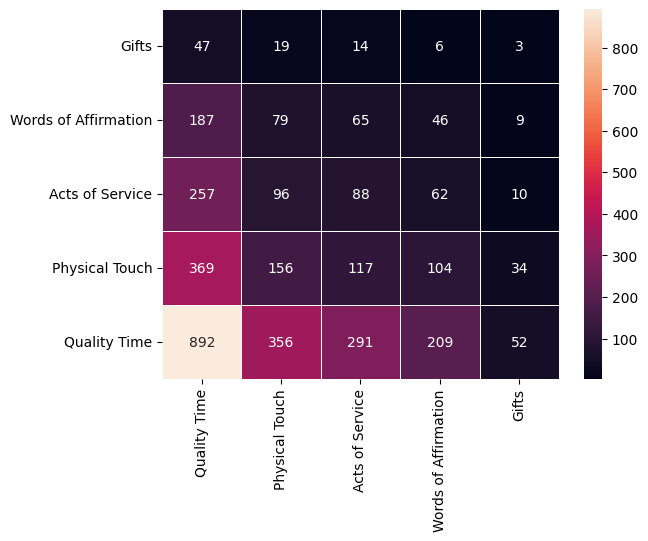

In [29]:
import seaborn as sns
        
tick_labels = ["Quality Time", "Physical Touch",
               "Acts of Service", "Words of Affirmation", "Gifts"]
ax = sns.heatmap(love_lang_mat, 
                 annot=True, 
                 fmt="d", 
                 linewidths=.5, 
                 cmap='rocket',
                 xticklabels=tick_labels, 
                yticklabels=tick_labels)
ax.invert_yaxis()